# Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [2]:
#loading Data
df=pd.read_csv('WiDS Dataton.csv')

In [3]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,december_min_temp,days_below_10F,days_below_0F,days_above_80F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
df.shape

(31107, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31107 entries, 0 to 31106
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                31107 non-null  int64  
 1   State_Factor               31107 non-null  object 
 2   building_class             31107 non-null  object 
 3   facility_type              31107 non-null  object 
 4   floor_area                 31107 non-null  float64
 5   year_built                 29614 non-null  float64
 6   energy_star_rating         14502 non-null  float64
 7   ELEVATION                  31107 non-null  float64
 8   january_min_temp           31107 non-null  int64  
 9   january_avg_temp           31107 non-null  float64
 10  january_max_temp           31107 non-null  int64  
 11  february_min_temp          31107 non-null  int64  
 12  february_avg_temp          31107 non-null  float64
 13  february_max_temp          31107 non-null  int

In [6]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'november_max_temp', 'december_min_temp', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'id'],
      dtype='object')

In [7]:
df.shape

(31107, 41)

# Remove column

In [8]:
df.drop(['id'],axis=1,inplace=True)

# Remove Duplicated

In [11]:
# Dropping the duplicate rows
print("Number of duplicate rows : ",df.duplicated().sum())

df.drop_duplicates(inplace=True)

Number of duplicate rows :  0


# Data Cleaning
missing Value

In [12]:
df.isnull().sum().sort_values(ascending = False).head(10)

direction_peak_wind_speed    19943
max_wind_speed               19908
direction_max_wind_speed     19908
days_with_fog                18478
energy_star_rating           16582
year_built                    1473
Year_Factor                      0
july_max_temp                    0
june_min_temp                    0
june_avg_temp                    0
dtype: int64

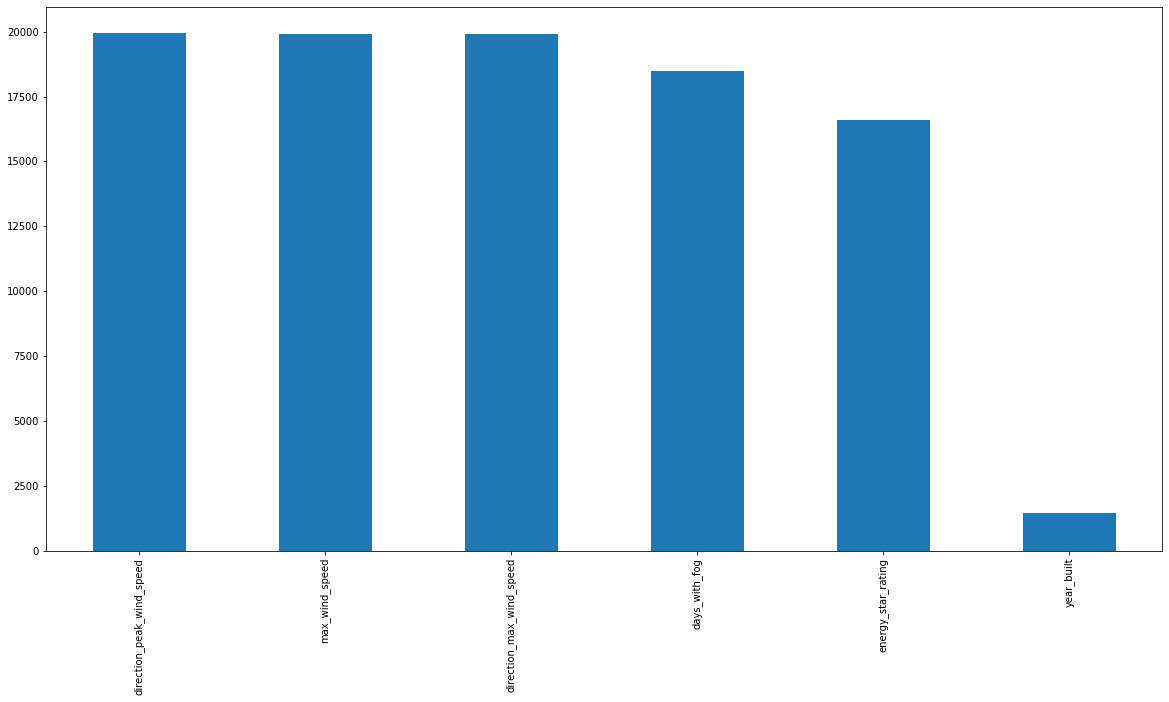

In [13]:
plt.figure(figsize=(20,10))
df.isnull().sum().sort_values(ascending = False).head(6).plot(kind='bar')
plt.show()

In [14]:
df.drop(['days_with_fog','direction_peak_wind_speed','energy_star_rating',
           'direction_max_wind_speed','max_wind_speed'],axis=1,inplace=True)

# Replace Nan value

In [20]:
np.array(df['year_built']).reshape(-1, 1).shape

(31081, 1)

In [23]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='mean') #'median', 'mean', 'constant', 'most_frequent'

df['year_built']=imputer.fit_transform(np.array(df['year_built']).reshape(-1, 1))


#df.fillna(int(df['year_built'].mean()),inplace=True)

In [24]:
df['year_built'].isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31081 entries, 0 to 31106
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Factor        31081 non-null  int64  
 1   State_Factor       31081 non-null  object 
 2   building_class     31081 non-null  object 
 3   facility_type      31081 non-null  object 
 4   floor_area         31081 non-null  float64
 5   year_built         31081 non-null  float64
 6   ELEVATION          31081 non-null  float64
 7   january_min_temp   31081 non-null  int64  
 8   january_avg_temp   31081 non-null  float64
 9   january_max_temp   31081 non-null  int64  
 10  february_min_temp  31081 non-null  int64  
 11  february_avg_temp  31081 non-null  float64
 12  february_max_temp  31081 non-null  int64  
 13  march_min_temp     31081 non-null  int64  
 14  march_avg_temp     31081 non-null  float64
 15  march_max_temp     31081 non-null  int64  
 16  april_min_temp     310

In [26]:
df['facility_type'].head()

0                 Grocery_store_or_food_market
1    Warehouse_Distribution_or_Shipping_center
2                         Retail_Enclosed_mall
3                    Education_Other_classroom
4                    Warehouse_Nonrefrigerated
Name: facility_type, dtype: object

# Data Encoding

In [27]:
for col in ['State_Factor','facility_type','building_class']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column State_Factor is :  4
number of column State_Factor is :  ['State_1' 'State_2' 'State_4' 'State_6']
number of column facility_type is :  58
number of column facility_type is :  ['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Religious_worship' 'Commercial_Unknown'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Public_Assembly_Social_meeting' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_S

## Label encoder

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

lb=LabelEncoder()

for col in ['State_Factor','facility_type']:
    df[col] = lb.fit_transform(df[col])

In [31]:
df['State_Factor']=lb.fit_transform(df['State_Factor'])

In [32]:
df['State_Factor'].unique()

array([0, 1, 2, 3], dtype=int64)

## OneHotEconder

In [33]:
onehotencoder=OneHotEncoder()

X=onehotencoder.fit_transform(np.array(df['building_class']).reshape(-1,1)).toarray()

In [34]:
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
len(df.columns)

35

In [39]:
('S'+str(len(df.columns)))

'S35'

In [41]:
range(X.shape[1])

range(0, 2)

In [40]:
X.shape[1]

2

In [42]:
for i in range(X.shape[1]):
    df['N_'+str(len(df.columns))] = X[:,i]
    
df.drop(['building_class'],axis=1,inplace=True)


In [43]:
df.head()

,Year_Factor,State_Factor,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,N_35,N_36
0,1,0,12,61242.0,1942.0,2.4,36,50.5,68,35,...,84,52,72,36,0,0,14,248.682615,1.0,0.0
1,1,0,54,274000.0,1955.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,26.500150,1.0,0.0
2,1,0,47,280025.0,1951.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,24.693619,1.0,0.0
3,1,0,5,55325.0,1980.0,1.8,36,50.5,68,35,...,84,52,72,36,0,0,14,48.406926,1.0,0.0
4,1,0,55,66000.0,1985.0,2.4,36,50.5,68,35,...,84,52,72,36,0,0,14,3.899395,1.0,0.0


In [44]:
y=df['State_Factor']

In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: State_Factor, dtype: int64

In [46]:
X=df.drop(['State_Factor'],axis=1)

In [49]:
X.head()

,Year_Factor,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,N_35,N_36
0,1,12,61242.0,1942.0,2.4,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,248.682615,1.0,0.0
1,1,54,274000.0,1955.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,26.500150,1.0,0.0
2,1,47,280025.0,1951.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,24.693619,1.0,0.0
3,1,5,55325.0,1980.0,1.8,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,48.406926,1.0,0.0
4,1,55,66000.0,1985.0,2.4,36,50.5,68,35,50.589286,...,84,52,72,36,0,0,14,3.899395,1.0,0.0


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31081 entries, 0 to 31106
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Factor        31081 non-null  int64  
 1   facility_type      31081 non-null  int32  
 2   floor_area         31081 non-null  float64
 3   year_built         31081 non-null  float64
 4   ELEVATION          31081 non-null  float64
 5   january_min_temp   31081 non-null  int64  
 6   january_avg_temp   31081 non-null  float64
 7   january_max_temp   31081 non-null  int64  
 8   february_min_temp  31081 non-null  int64  
 9   february_avg_temp  31081 non-null  float64
 10  february_max_temp  31081 non-null  int64  
 11  march_min_temp     31081 non-null  int64  
 12  march_avg_temp     31081 non-null  float64
 13  march_max_temp     31081 non-null  int64  
 14  april_min_temp     31081 non-null  int64  
 15  april_avg_temp     31081 non-null  float64
 16  april_max_temp     310

# Data Scaling  ( Normalization)

## MinmaxScaler

In [51]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
X_scaler_minMax = my_scaler.fit_transform(X)

In [52]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(0.0, 1.0000000000000002)

## StandardScaler

In [53]:
# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X_scaler_SD = my_scaler.fit_transform(X)

In [54]:
X_scaler_SD.min(),X_scaler_SD.max()

(-48.040129536031344, 23.37089752761405)

In [55]:
# The FLAIR Dataset
df1=pd.read_excel('FLAIR.xlsx')

In [56]:
df1.head()

,Grade,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,...,HighGrayLevelZoneEmphasis.8,SmallAreaEmphasis.8,LowGrayLevelZoneEmphasis.8,ZoneEntropy.8,SmallAreaLowGrayLevelEmphasis.8,Coarseness.8,Complexity.8,Strength.8,Contrast.17,Busyness.8
0,G3,66128.198147,76.445742,65961.755872,65.085462,0.429089,38.263796,0.767897,0.278937,75.668933,...,277.402591,0.506227,0.006699,7.335374,0.003439,0.000290,493.516512,0.160640,0.037193,4.642676
1,G3,42859.730845,80.357188,42698.161698,60.921389,0.242761,32.889643,0.828271,0.569949,67.817658,...,1330.520271,0.553848,0.001828,8.483351,0.001098,0.000302,3753.271317,0.925349,0.074086,1.285368
2,G3,82152.352810,75.203906,82058.924059,59.102747,0.631804,40.248334,0.866919,0.176141,68.502484,...,922.439112,0.528537,0.002165,7.837059,0.001278,0.000327,1169.237649,0.425810,0.040942,1.333684
3,G2,170801.825047,104.667500,170412.851512,88.798239,0.522666,49.082383,0.669372,0.166888,102.222286,...,1269.891485,0.534633,0.000987,7.606911,0.000577,0.000108,1642.857844,0.186846,0.026610,2.797768
4,G3,183574.563980,136.212971,183314.798733,108.628040,0.406995,46.002675,0.578327,0.209168,117.988150,...,2046.850844,0.553940,0.000650,7.717110,0.000385,0.000100,2903.731334,0.460532,0.011195,1.517517


Grade        : 
 G2    68
G3    67
Name: Grade, dtype: int64


G2    0.503704
G3    0.496296
Name: Grade, dtype: float64


<AxesSubplot:title={'center':'Grade'}>

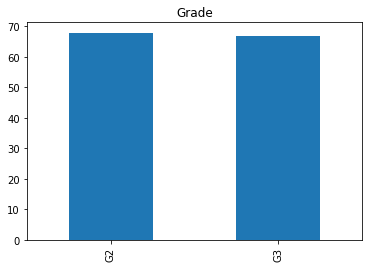

In [57]:
# Lets know how many values
print("Grade        : \n",df1["Grade"].value_counts())
print("\n")
print(df1["Grade"].value_counts(normalize=True))

# plot.bar(title='') function is used to plot bargraph 
df1["Grade"].value_counts().plot.bar(title="Grade")


In [35]:
df1.shape

(135, 852)

# Dimensionality Reduction

In [58]:
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [61]:
from sklearn.decomposition import PCA
pc=PCA(n_components=64)
data=pc.fit_transform(X,y)

In [62]:
data.shape

(135, 64)

# Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest

f=SelectKBest(k=15)
my_data1=f.fit_transform(data,y)
my_data1.shape

(135, 15)

In [65]:
from sklearn.feature_selection import SelectPercentile

f=SelectPercentile(percentile=30)
my_data2=f.fit_transform(data,y)
my_data2.shape

(135, 19)

In [67]:
from sklearn.feature_selection import GenericUnivariateSelect ,f_classif,chi2

selecting=GenericUnivariateSelect(score_func=f_classif,param=5,mode='k_best')
my_data3=selecting.fit_transform(data,y)
my_data3.shape

(135, 5)

In [68]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df1["Grade"] = lb.fit_transform(df1["Grade"])

#renaming 
#df1['Grade']=df1['Grade'].replace({0:'G2' , 1: 'G3'})

In [70]:
df1["Grade"].head()

0    1
1    1
2    1
3    0
4    1
Name: Grade, dtype: int32

In [69]:
my_data1.shape,df1['Grade'].shape

((135, 15), (135,))

# Spliting Data 
### train test split

In [71]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(my_data1,df1["Grade"],
                                   test_size= 0.20, random_state=100, stratify=df1["Grade"])

In [72]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (108, 15)  y_train =  (108,)
X_test  =  (27, 15)  y_test  =  (27,)


# KFold Spliting

In [49]:
from sklearn.model_selection import KFold

KNNModel = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2) 


kf = KFold(n_splits=3)


for i, (train_index, test_index) in enumerate(kf.split(my_data1)):
    
    KNNModel.fit(my_data1[train_index], df1["Grade"][train_index])
    y_pred=KNNModel.predict(my_data1[test_index])
    #Calculating Details
    print(f"Fold {i+1}")
    print('KNNModel Train Score is : ' , KNNModel.score(my_data1[train_index], df1["Grade"][train_index]))
    print('KNNModel Test Score is : ' , KNNModel.score(my_data1[test_index], df1["Grade"][test_index]))
    print()

Fold 1
KNNModel Train Score is :  0.5888888888888889
KNNModel Test Score is :  0.4222222222222222

Fold 2
KNNModel Train Score is :  0.5888888888888889
KNNModel Test Score is :  0.4444444444444444

Fold 3
KNNModel Train Score is :  0.6111111111111112
KNNModel Test Score is :  0.5777777777777777

